In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 (141)

## Importing data

In [163]:
F_location ='C:\\Users\\raymondk\\Desktop\\Study\\Python\\Python for Data Science and Machine Learning Bootcamp\\Course work\\Section 25 Neural Nets and Deep Learning\\TensorFlow_FILES\\DATA\\cancer_classification.csv'

In [164]:
df = pd.read_csv(F_location)

## Exploratory Data Analysis (EDA)

### Count plot of the lable (what we want to predict)
**Doing this count plot will show if the data is well balanced between the categories we want to predict with**

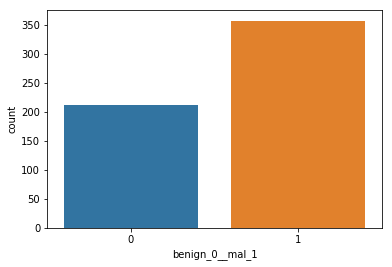

In [165]:
sns.countplot(x='benign_0__mal_1',data=df)

## Determining the correlation of the features to the lable

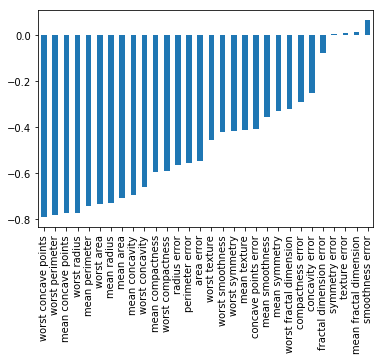

In [166]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [167]:
#plt.figure(figsize=(12,12))
#sns.heatmap(df.corr())

## Creating the train test split

In [168]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Scalling the data

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
scaler = MinMaxScaler()

In [173]:
X_train = scaler.fit_transform(X_train)

In [174]:
X_test = scaler.transform(X_test)

# Part 2 (142)

## Creating the model

In [175]:
from tensorflow.keras.models import Sequential

In [176]:
from tensorflow.keras.layers import Dense,Dropout

In [177]:
X_train.shape

(426, 30)

In [178]:
model = Sequential()

model.add(Dense(units=30,activation = 'relu'))
model.add(Dense(units=15,activation = 'relu'))
#BECAUSE THIS IS A BINARY CLASSIFICATION THE LAST LAYER MUST BE SIGMOID I.E YES / NO 
model.add(Dense(units=1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [179]:
model.fit(x = X_train, y = y_train,epochs=600,validation_data=(X_test,y_test),verbose=0)

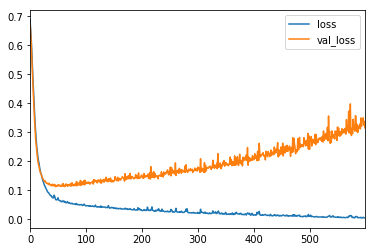

In [180]:
losses = pd.DataFrame(model.history.history)
losses.plot()

**Looking at the plot above it is a clear indication of over fitting the model the value loss crossed above the loss line**

## Recreating the model to prevent over fitting
**This will be done with the help of a early stop**

In [181]:
model = Sequential()

model.add(Dense(units=30,activation = 'relu'))
model.add(Dense(units=15,activation = 'relu'))
#BECAUSE THIS IS A BINARY CLASSIFICATION THE LAST LAYER MUST BE SIGMOID I.E YES / NO 
model.add(Dense(units=1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [182]:
from tensorflow.keras.callbacks import EarlyStopping

In [183]:
#help(EarlyStopping)

In [184]:
#The mode will monitor the min val loss and have a patience of 25 epocs once the min is reached
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [185]:
model.fit(x = X_train, y = y_train,epochs=600,validation_data=(X_test,y_test),verbose=0,
         callbacks=[early_stop])

Epoch 00076: early stopping


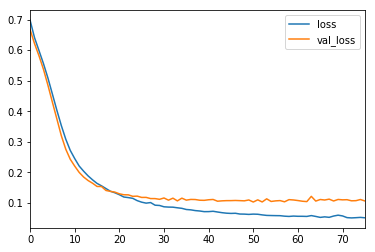

In [186]:
Early_stop_loss = pd.DataFrame(model.history.history)
Early_stop_loss.plot()

## Further eliminating over fitting using dropout calls

In [187]:
model = Sequential()

model.add(Dense(units=30,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation = 'relu'))
model.add(Dropout(0.5))

#BECAUSE THIS IS A BINARY CLASSIFICATION THE LAST LAYER MUST BE SIGMOID I.E YES / NO 
model.add(Dense(units=1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

**Dropout(0.5) typically used, this means that 50% of the neurons of the layer will be randomly turned off i.e first layer will have 15(0.5 * 30) turned off and second layer 7.5(0.5 * 15)**

In [188]:
model.fit(x = X_train, y = y_train,epochs=600,validation_data=(X_test,y_test),verbose=0,
         callbacks=[early_stop])

Epoch 00180: early stopping


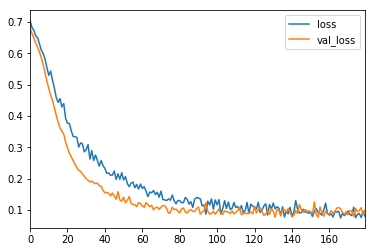

In [189]:
dropout_earlystop_losses = pd.DataFrame(model.history.history)
dropout_earlystop_losses.plot()

**Now that the model is correctly fitted lets predict the lable with it**

In [190]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## Analysing the predictions

In [191]:
from sklearn.metrics import classification_report , confusion_matrix

In [193]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

   micro avg       0.96      0.96      0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [194]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]
